# StarDist (2D)

## Usage

[tutorial](https://www.youtube.com/watch?v=Amn_eHRGX5M)

- 2d cell segmentation
- optimization for our own data

## Requirements(Installation)

```
conda create --name cell python=3.8
conda activate cell
python -m pip install stardist
```


In [6]:
# chose a region of interest
from PIL import Image
image = Image.open("../sample_img/original_image_000001.tiff")
box = (100, 100, 400, 400)
cropped_image = image.crop(box)
cropped_image.save('../sample_img/cropped_example2.tiff')

## Pretrained models


In [10]:
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained(
    '2D_paper_dsb2018')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


Text(0.5, 1.0, 'prediction + input overlay')

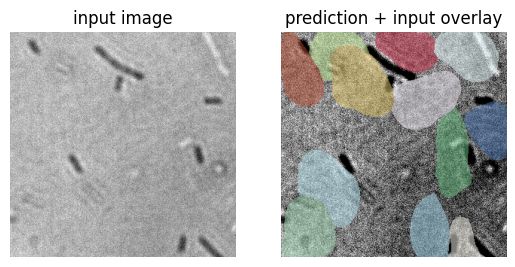

In [11]:
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from imageio.v2 import imread

img = imread('../sample_img/cropped_example2.tiff')

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1, 2, 2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

the pertrained model does not work well for this dataset?


## Training

see: [colab](https://colab.research.google.com/github/stardist/stardist/blob/master/extras/stardist_example_2D_colab.ipynb#scrollTo=sEU15_9zSf6d)
